<a href="https://colab.research.google.com/github/archietech-ai/pytorch/blob/main/ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#ANN

In [1]:
# import libraries
import numpy as np
import torch  # Imports the entire PyTorch library
import torch.nn as nn # Imports specifically the neural network module from PyTorch. Allows you to use nn. instead of torch.nn. (shorter alias)
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') ## Output is vector-based, stays crisp at any zoom level

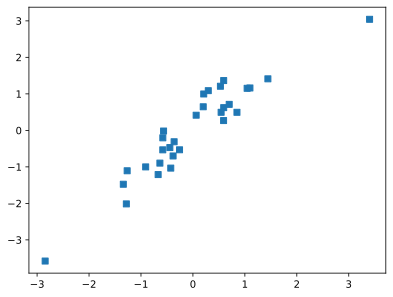

In [5]:
# create data

N = 30 # we want to create 30 data points
x = torch.randn(N,1) # Generate N random numbers from normal distribution (mean=0, std=1)
y = x + torch.randn(N,1)/2  ## Create y values based on x with added noise. When we use torch.randn(N,1)/2, we get numbers from N(0,0.5) - same mean as normal distribution but std=0.5. This creates a noisy linear relationship between x and y


# and plot
plt.plot(x,y,'s') ## 's' means plot with square markers
plt.show()

In [6]:
# build model
# Input → Linear Layer → ReLU             → Linear Layer → Output
# (1D)     (1→1)         (nonlinearity)          (1→1)     (1D)

ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer.  First layer: 1 input → 1 output
    nn.ReLU(),       # activation function. ReLU activation function: f(x) = max(0,x)
    nn.Linear(1,1)   # output layer. 1 input → 1 output
    )

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

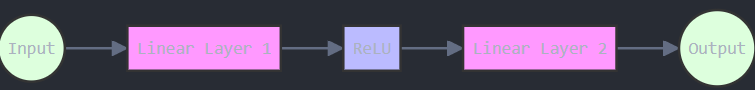

In [8]:
# learning rate
learningRate = .05

# loss function. Loss function measures error
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement). Optimizer updates network parameters to reduce error
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate) # Takes model parameters and learning rate

In [9]:
# train the model
numepochs = 500  #  # Number of training iterations
losses = torch.zeros(numepochs) # # Array to store loss at each epoch. It creates an array: [0, 0, 0, ..., 0] (500 zeros)
#During training, each slot will store the loss value for that epoch
# For example, after training"
# losses[0] = loss from first epoch
# losses[1] = loss from second epoch
# losses[2] = loss from third epoch
# ...and so on until epoch 500


## Train the model!
for epochi in range(numepochs): # Training loop

  # forward pass
  yHat = ANNreg(x) #  After training, the variable ANNreg holds the model.

  # compute loss
  loss = lossfun(yHat,y) # Calculate error between predictions and actual values
  losses[epochi] = loss  # Store loss for this epoch

  # backprop
  optimizer.zero_grad() # Clear previous gradients. PyTorch adds new gradients to existing ones rather than replacing them.
  # Without clearing, gradients from multiple backward passes would add up. This would make the updates incorrect

  loss.backward() # Calculate gradients. Gradients are only computed when we call loss.backward()
  optimizer.step() # Update weights using gradients

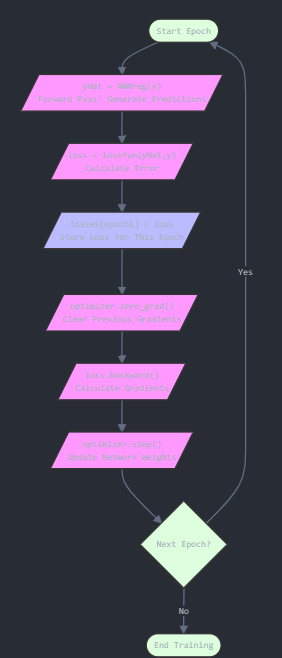

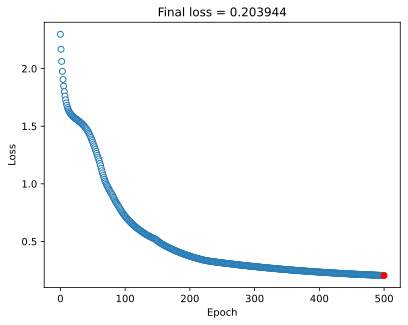

In [16]:
# show the losses
#print(losses)
# manually compute losses
# final forward pass
predictions = ANNreg(x)  # The variable ANNreg now has our trained model. we do one prediction using the same training data set
# x is a tensor containing all 30 data points we created earlier. Makes predictions for all 30 x values at once

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()  # This is an MSE function that we define manually

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1) # All training losses we got during traiining
plt.plot(numepochs,testloss.detach(),'ro') # Final loss as red dot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [17]:
testloss.item()

0.20394404232501984

In [19]:
testloss  # this line shows that we have grad that is attached to the loss value. That is the reason we have detach() in the following cell to seperate the value of gradient from loss

tensor(0.2039, grad_fn=<MeanBackward0>)

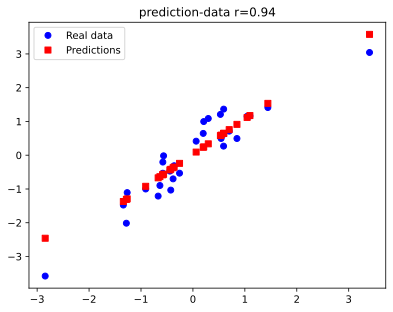

In [12]:
# plot the data
plt.plot(x,y,'bo',label='Real data')  # 'bo' means blue circles. Plots original data points (x vs y)
plt.plot(x,predictions.detach(),'rs',label='Predictions') #'rs' means red squares. Plots model predictions (x vs predicted y)
# The detach() method in PyTorch disconnects a tensor from its computational graph.
# PyTorch keeps track of operations on tensors for backpropagation. It maintains history of computations in a graph. This allows calculation of gradients
# When plotting/analyzing: We don't need gradient tracking. We just want the raw values. detach() removes this tracking
# detach() removes from computational graph
# We use detach() because: We're just visualizing results. We don't need gradients for plotting and Matplotlib expects regular numpy arrays/numbers

plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}') # Calculates correlation coefficient between real y and predictions
# Shows how well predictions match actual data. r=1.00 would be perfect prediction. r=0 would be no correlation
# In the following figure we see that r2 is 0.94

plt.legend() # Shows the blue/red labels
plt.show()

# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.